In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

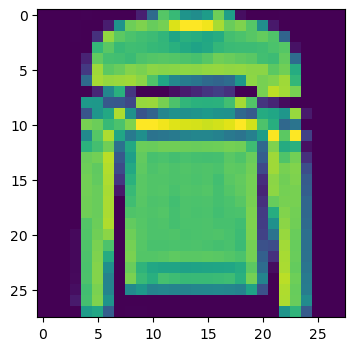

In [3]:
plt.figure(figsize=(4,4))
plt.imshow(X_train[5])

In [4]:
#Normalizing the data
X_train=X_train/255
X_test=X_test/255

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [8]:
#Converting the target values into one-hot encoding format
from tensorflow.keras.utils import to_categorical

In [9]:
y_train_hot=to_categorical(y_train)
y_test_hot=to_categorical(y_test)

In [10]:
y_train_hot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Input

In [12]:
model=Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 25, 25, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop=EarlyStopping(monitor='val_loss',patience=2)

In [16]:
model.fit(X_train,y_train_hot,epochs=10,validation_data=(X_test,y_test_hot),callbacks=[earlystop])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8115 - loss: 0.5308 - val_accuracy: 0.8756 - val_loss: 0.3529
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8957 - loss: 0.2831 - val_accuracy: 0.8937 - val_loss: 0.2891
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9126 - loss: 0.2358 - val_accuracy: 0.9010 - val_loss: 0.2685
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9242 - loss: 0.2019 - val_accuracy: 0.9102 - val_loss: 0.2510
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9339 - loss: 0.1724 - val_accuracy: 0.9065 - val_loss: 0.2637
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9443 - loss: 0.1475 - val_accuracy: 0.9072 - val_loss: 0.2710


In [17]:
losses=pd.DataFrame(model.history.history)

In [18]:
losses

,accuracy,loss,val_accuracy,val_loss
0,0.857967,0.400148,0.8756,0.352863
1,0.898083,0.275946,0.8937,0.289143
2,0.914783,0.232929,0.9010,0.268542
3,0.925733,0.200818,0.9102,0.250961
4,0.933600,0.174243,0.9065,0.263678
5,0.943700,0.151542,0.9072,0.270953


<Axes: >

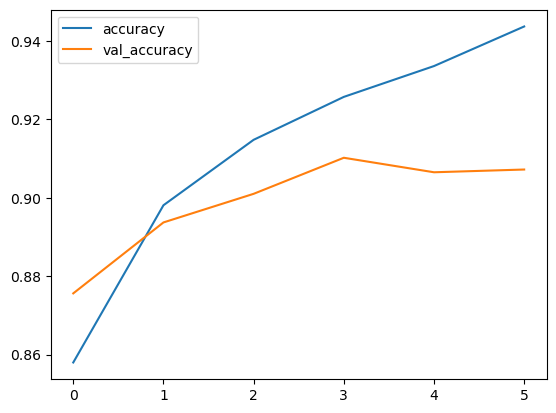

In [22]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

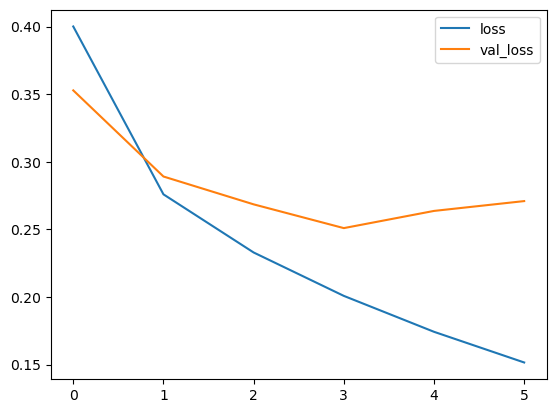

In [23]:
losses[['loss','val_loss']].plot()

In [25]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test_hot,verbose=0))

['loss', 'compile_metrics']
[0.2709534168243408, 0.9071999788284302]


In [31]:
predictions=np.argmax(model.predict(X_test),axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [33]:
predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [34]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       996
           1       0.98      1.00      0.99       983
           2       0.88      0.81      0.84      1085
           3       0.92      0.92      0.92      1004
           4       0.84      0.83      0.84      1005
           5       0.99      0.96      0.97      1036
           6       0.72      0.77      0.74       932
           7       0.94      0.97      0.95       972
           8       0.98      0.99      0.99       988
           9       0.96      0.97      0.97       999

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [43]:
Target={0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:' Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}

In [44]:
test=X_test[45]

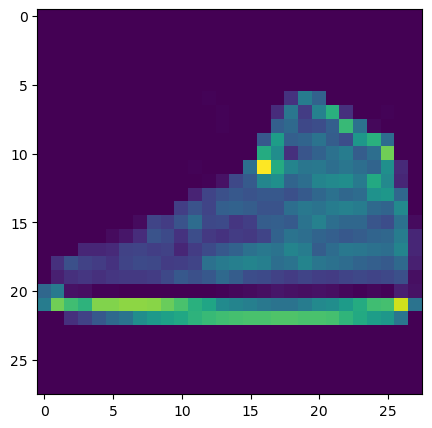

In [46]:
plt.figure(figsize=(5,5))
plt.imshow(test)

In [58]:
pred=np.argmax(model.predict(test.reshape(1,28,28,1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [59]:
Target[pred]

'Sneaker'